In [12]:
from FPMLmodule import utils
import tensorflow as tf
import datasets as ds
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
import gc
import os

STUDIES = [FINGER_NAME, FINGERPRINT_TYPE, GENDER, SAME_PERSON] = ['FingerName', 'FingerprintType', 'GenderStudy', 'SamePerson']
GENDER_DATASETS = [ds.NISTSDB4Gender, ds.SOCOFingGender]
FINGER_NAME_DATASETS = [ds.SOCOFingFingers, ds.NISTSDB300aFingers, ds.NISTSDB302bFingers]
SAME_PERSON_DATASETS = [ds.SOCOFingSamePerson, ds.NISTSDB300aSamePerson, ds.SOCOFingSamePerson]



STUDY = GENDER
DATASETS = GENDER_DATASETS

out_path = 'out_final'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.random.set_seed(9)



In [13]:
def displayConfusion(dataset, model):
    test_images = []
    y_test = []
    y_predict = []

    for images, labels in dataset:

        tmp_predict = model.predict(images)
        tmp_true_max = np.argmax(labels.numpy(), axis=1).astype(np.uint8)
        tmp_pred_max = np.argmax(tmp_predict, axis=1).astype(np.uint8)
        test_images = [*test_images, *images]
        y_test = [*y_test, *tmp_true_max]
        y_predict = [*y_predict, *tmp_pred_max]

    cm = confusion_matrix(y_test, y_predict)
    sn.heatmap(cm ,annot = True, fmt='g')
    acc = (np.array(y_test) == np.array(y_predict)).sum()/len(y_test)
    plt.title("Test Set Accuracy:  "+str(round(acc*100, 2)))
    plt.tight_layout()

In [14]:
datasetsConfig = {
    'batchSize': 32, 
    'parallelTune': tf.data.AUTOTUNE, 
    'split': [1], 
    'inputDim': (224, 224, 3), 
    'seed': 15, 
    'shuffle': True
    }






In [17]:
def evaluate_research(study, study_datasets):
    datasets = [ dataset(**datasetsConfig) for dataset in study_datasets]
    splits = [dataset.create() for dataset in datasets]
    dataset_researched = next(os.walk(f'./{out_path}/{study}'))[1]
    for dsr in dataset_researched:
        chainedTest = None
        evaluates_on = [] 
        # final_models_for_ds = next(os.walk(f'./{out_path}/{study}/{dsr}/FinalModels'))[1]
        for i, (dataset, split) in enumerate(zip(datasets, splits)):
            if dataset.name != dsr:
                evaluates_on.append(dataset.name)
                if chainedTest:
                    chainedTest = chainedTest.concatenate(split[0])
                else:
                    chainedTest = split[0]
        print('\n\t\ttrained on:', dsr, ' --- evaluates on:', *evaluates_on, '\n')  
        final_models_path = f'./{out_path}/{study}/{dsr}/FinalModels/'
        finel_models_names = next(os.walk(final_models_path))[1]
        plt.figure(figsize=(10*len(finel_models_names), 5))
        for (i, model_name) in enumerate(finel_models_names):
            if model_name == 'FinalModels':
                continue
            print(model_name)
            plt.subplot(1, len(finel_models_names), i+1)
            displayConfusion(chainedTest, tf.keras.models.load_model(final_models_path + model_name))
        plt.show()   
        



		trained on: NISTSDB4Gender  --- evaluates on: SOCOfingGender 

Optimizer_RMSprop
ResNet-Classifier
Optimizer_Nadam


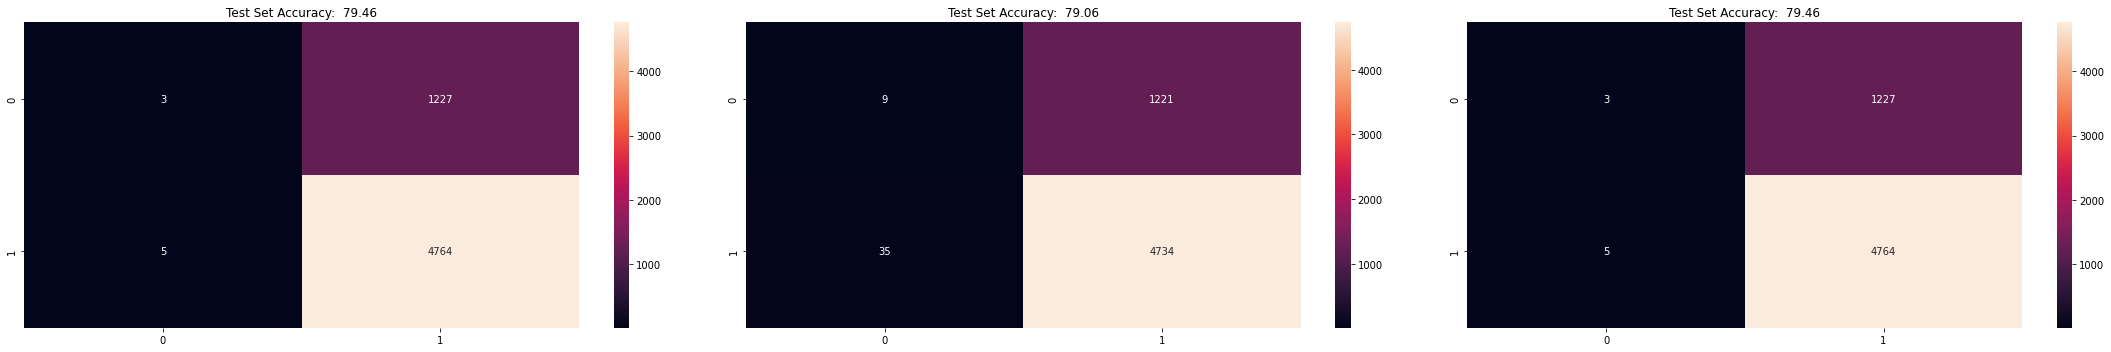


		trained on: SOCOfingGender  --- evaluates on: NISTSDB4Gender 

LearningRate_1e-05
AlexNet-Classifier
Optimizer_Nadam_2
ResNet50-Backbone
Optimizer_Nadam


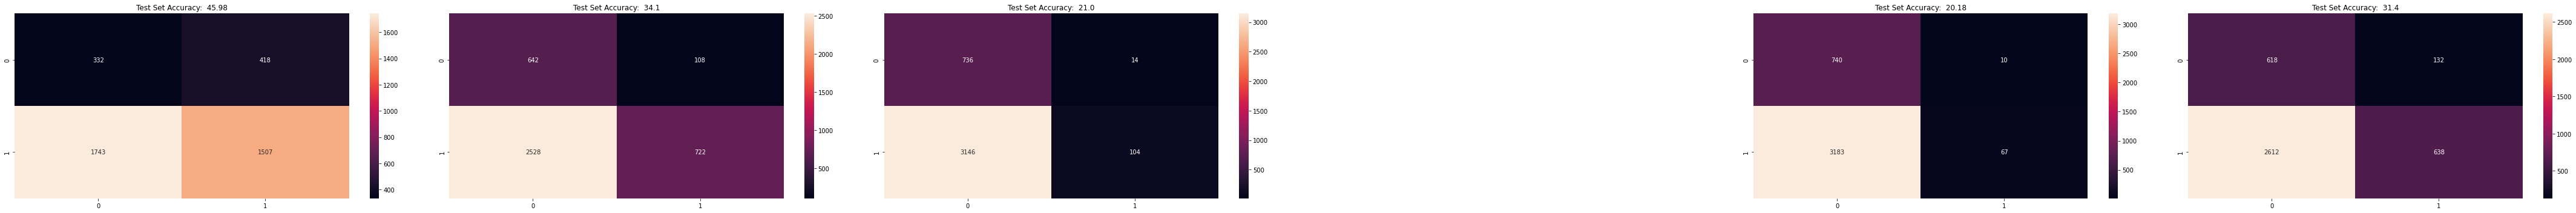


		trained on: PoliceV1Gender  --- evaluates on: NISTSDB4Gender SOCOfingGender 

LearningRate_0.001
LearningRate_0.0001


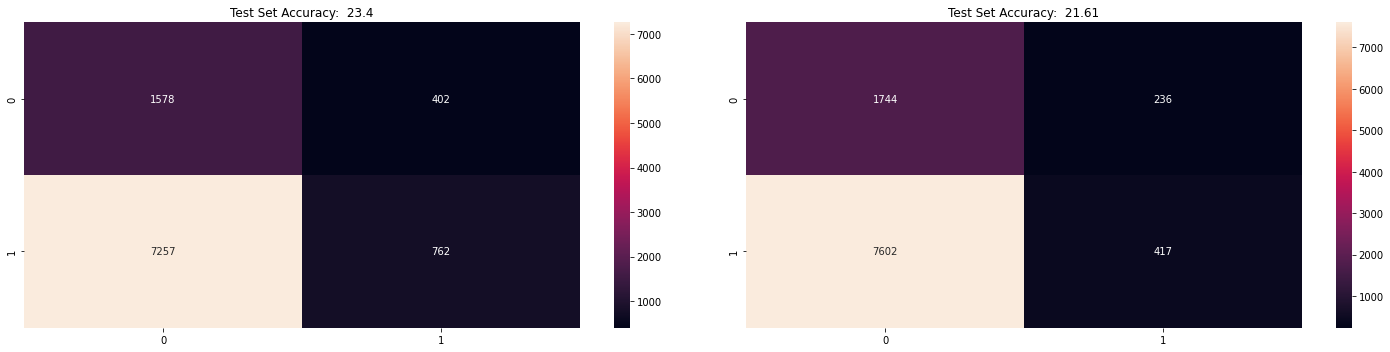


		trained on: PoliceV2Gender  --- evaluates on: NISTSDB4Gender SOCOfingGender 

LossFunction_binary_crossentropy
LearningRate_0.001
Classifier_DefaultClassifier
Xception-Backbone
Optimizer_Adam


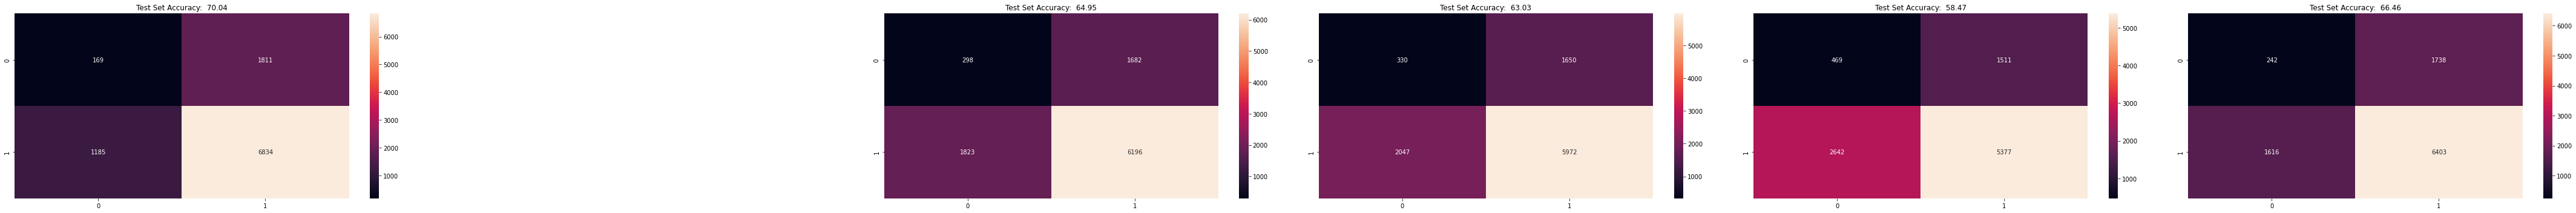

In [18]:
evaluate_research(GENDER, GENDER_DATASETS)


		trained on: PoliceV2SamePerson  --- evaluates on: SOCOFingSamePerson NISTSDB300aSamePerson SOCOFingSamePerson 

LearningRate_0.1
MobileNet-Classifier
ResNet50-Backbone
ResNet-Classifier
Optimizer_Nadam


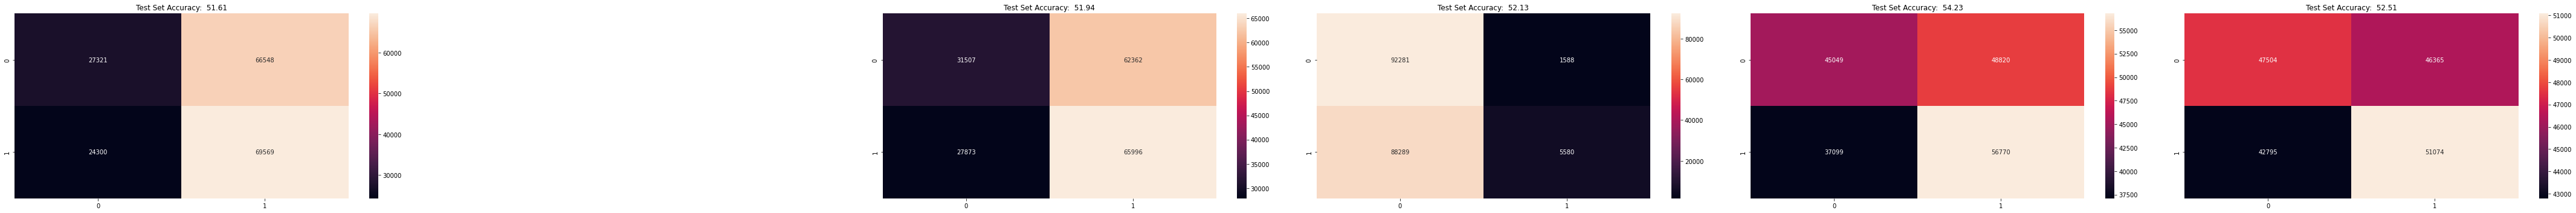


		trained on: SOCOFingSamePerson  --- evaluates on: NISTSDB300aSamePerson 

LearningRate_0.01
Optimizer_RMSprop
MobileNet-Classifier
ResNet-Classifier
Optimizer_Nadam


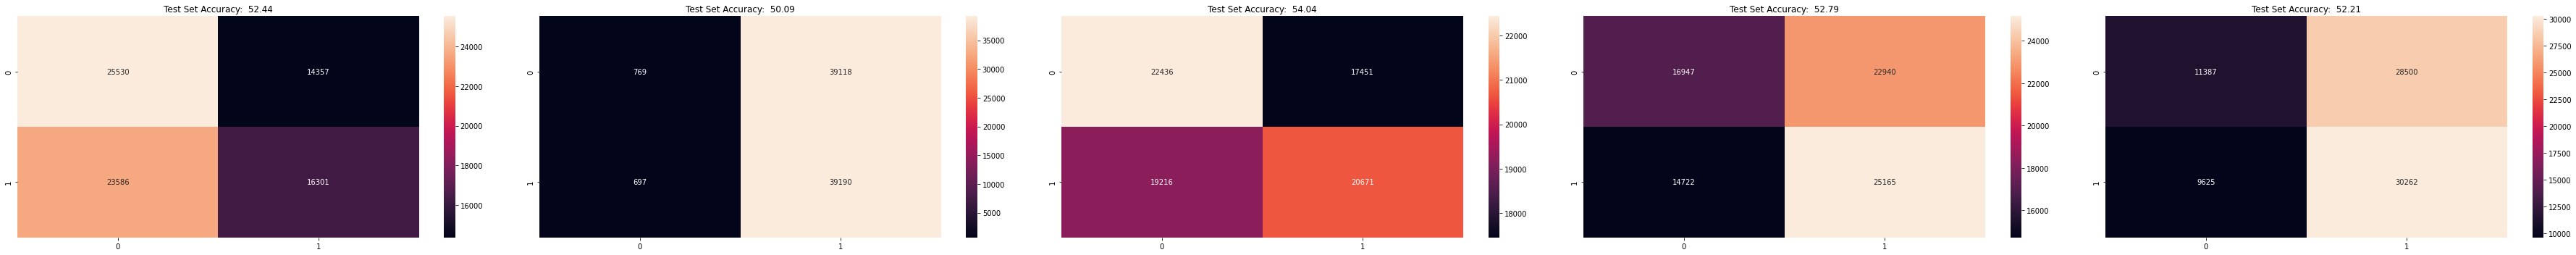


		trained on: PoliceV1SamePerson  --- evaluates on: SOCOFingSamePerson NISTSDB300aSamePerson SOCOFingSamePerson 

LearningRate_0.01
MobileNet-Classifier
ResNet50-Backbone
EfficientNetB2-Backbone
Optimizer_Nadam


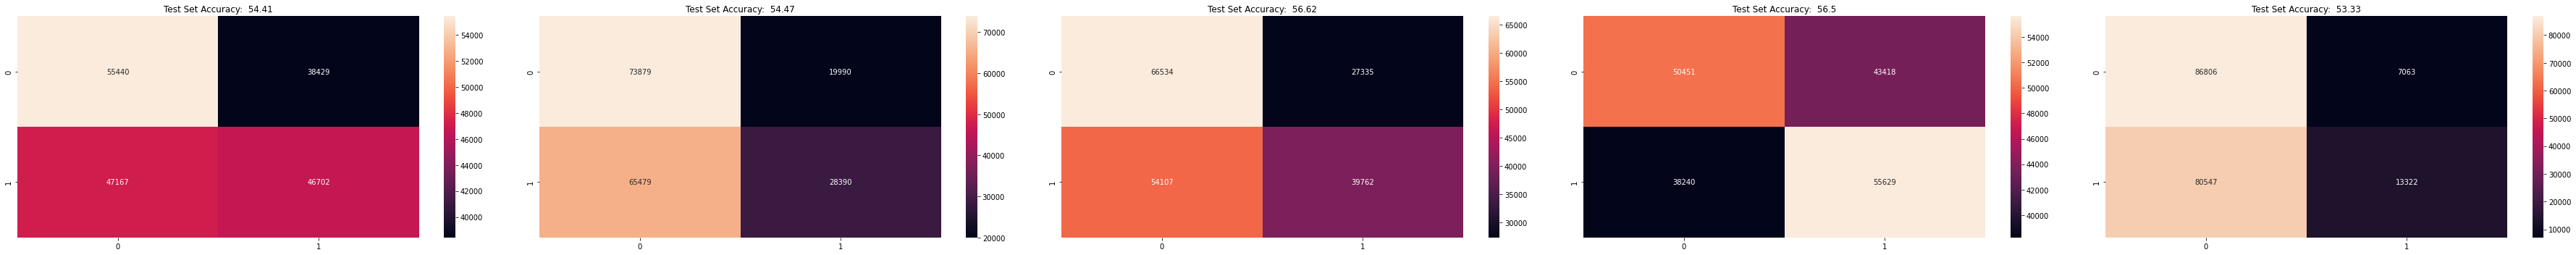


		trained on: NISTSDB300aSamePerson  --- evaluates on: SOCOFingSamePerson SOCOFingSamePerson 



StopIteration: 

In [19]:
evaluate_research(SAME_PERSON, SAME_PERSON_DATASETS)


		trained on: SOCOfingFingers  --- evaluates on: NISTSDB300aFingers NISTSDB302bFingers 

LearningRate_0.1
LearningRate_0.01
MobileNet-Classifier
ResNet-Classifier
Optimizer_Nadam


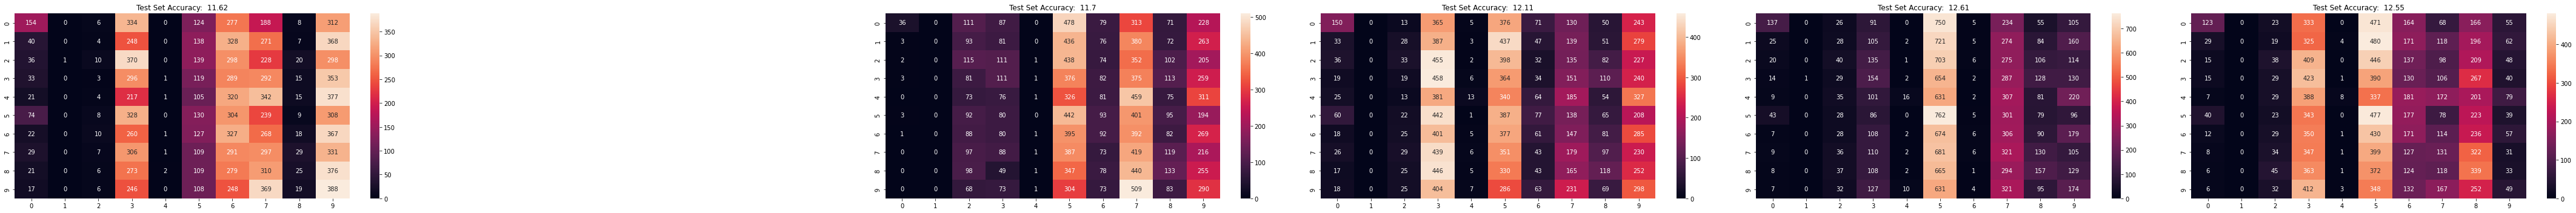


		trained on: PoliceV2Fingers  --- evaluates on: SOCOfingFingers NISTSDB300aFingers NISTSDB302bFingers 

LearningRate_0.1
LearningRate_0.01
MobileNet-Classifier
LearningRate_0.0001
ResNet-Classifier


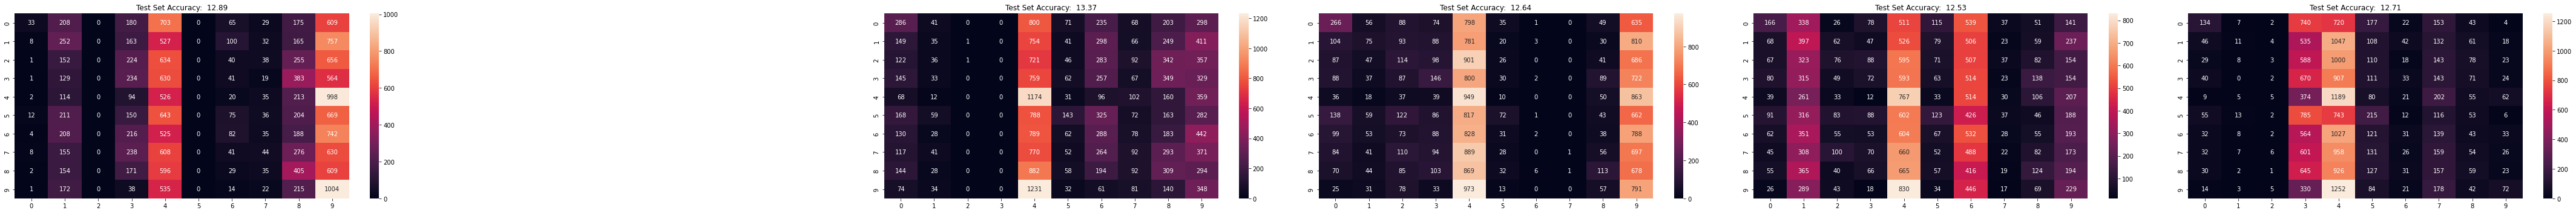


		trained on: PoliceV1Fingers  --- evaluates on: SOCOfingFingers NISTSDB300aFingers NISTSDB302bFingers 

LearningRate_0.1
LearningRate_0.01
Optimizer_RMSprop
MobileNet-Classifier
ResNet-Classifier


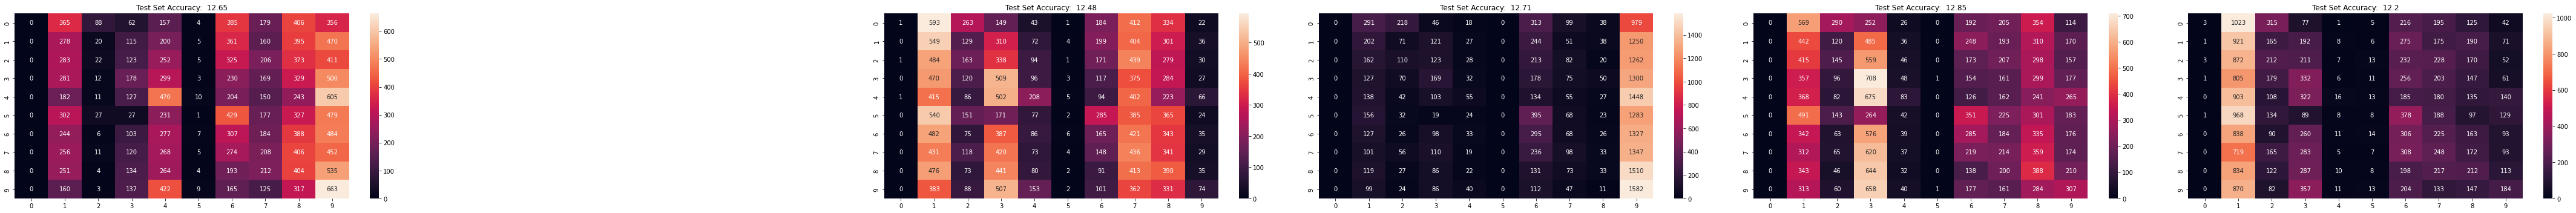


		trained on: NISTSDB4Fingers  --- evaluates on: SOCOfingFingers NISTSDB300aFingers NISTSDB302bFingers 

LearningRate_0.01
Optimizer_RMSprop
MobileNet-Classifier
ResNet-Classifier
Optimizer_Nadam


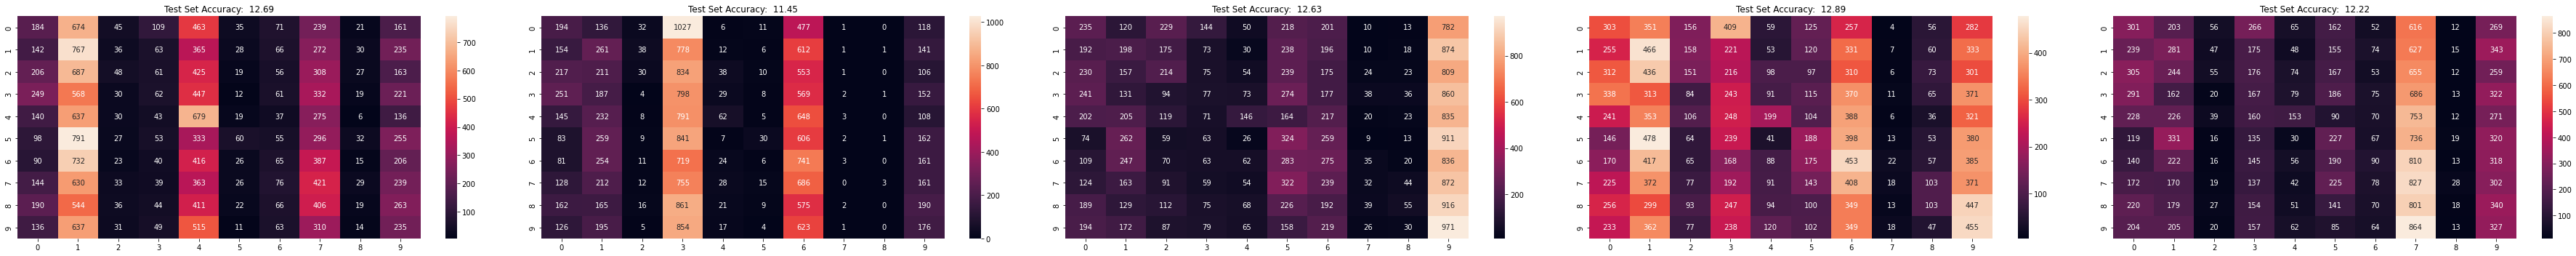

In [20]:
evaluate_research(FINGER_NAME, FINGER_NAME_DATASETS)